# Text Classification

<sup>This notebook is a part of Natural Language Processing class at the University of Ljubljana, Faculty for computer and information science. Please contact [slavko.zitnik@fri.uni-lj.si](mailto:slavko.zitnik@fri.uni-lj.si) for any comments.</sub>

Text classification is normally referred to as deriving a class for a text document according to precalculated features. A text document can be a paragraph, tweet post, sentence, forum post, ... On the other hand, text tagging problems deal with classification of tokens in a sequence. Sequences can represent tokens, sentences, forum thread, characters, ...

<img src="classifiers.png" width="600">

## Text Classification

Some examples of text classification problems are text categorization, spam detection, sentiment analysis, language identification, ... Definition of a problem:

**Input:**
* a document $d \in D$
* a fixed set of classes $C=\{c_1, c_2, c_3, ... c_j\}$

**Output:**
* predicted class $c \in C$

Existing classifiers that can be used are naive Bayes, logistic regression, support-vector machines, k-nearest neighbours, classification tree, random forest, ...

### Naive Bayes

One of the simplest classification methods based on a Bayes rule. It assumes features independence and therefore it can lack performance (e.g. XOR problem).

$$
P(c|d) = \frac{P(d|c)P(c)}{P(d)} \\
c_{MAP} = \textrm{argmax}_{c \in C}P(c|d) = \textrm{argmax}_{c \in C}P(d|c)P(c)
$$

For the classification we need to define the features - i.e. representation of an input document for a classifier. A simple approach would be to use a bag of words representation:

<img src="bow1.png" width="400"> <img src="bow2.png" width="400">

$$
c_{MAP} = \textrm{argmax}_{c \in C}P(x_1, x_2, x_3, ..., x_n|c)P(c) \\
c_{MAP} = \textrm{argmax}_{c \in C}P(x_1|c)P(x_2|c)P(x_3) ... P(x_n|c)P(c)
$$

Generally we need to classify examples into one of the multiple classes, therefore a  *multinomial* naive Bayes classifier is defined as:

$$
c_{NB} = \textrm{argmax}_{c_j \in C} P(c_j) \prod_{i \in \textrm{features}} P(x_i|c_j)
$$

Basic code in Python:

```python
##################
### PSEUDOCODE ###
##################

# 1. Load data
# 2. Prepare features
features = []
classes = []

for example in examples:
    item = []

    # Our features (an idea)
    item.append(hasLink(example))
    item.append(frequency5w1h(example))
    item.append(numberOfEmoticons(example))
    item.append(numberOfUnicodeEmoticons(example))
    item.append(numberOfInterjections(example))
    item.append(containtsCapsWord(example))
    item.append(verbPos(example))
    item.append(numberOfNegations(example))
    item.append(hasFutureVerb(example))
    item += [hasPunctuations(example)[key] for key in punctuationKeys]
    item.append(containsOneOf_5w1h(example))
    item.append(textLength(example['tokens']))
    item.append(textUniqueLength(example['tokens']))
    item.append(textStemmedLength(example['tokens']))
    item.append(textStemmedUniqueLength(example['tokens']))
    item.append(postPos(example, examples))
    item.append(sentencePos(example, examples))
    item.append(hasQuestionmark(example))
    item.append(hasExclamationMark(example))
    item.append(hasThank(example))
    item.append(hasPositiveFeedback(example))
    item.append(sentimentValue(example))
    item.append(sentenceNormPos(example, examples))
    item.append(hasDuplicateWords(example))
    item.append(isQuote(example, examples))
    item.append(conversationSim(example, examples))
    item.append(initSim(example, examples))

    features.append(item)
    classes.append(example['class'])

(X, y) = (np.array(features), np.array(classes))
print(("Dataset shape: {}".format((X.shape, y.shape))))

# 3. Define classifier
clf = MultinomialNB(alpha=.01)

# 4. Train a classifier
clf.fit(X_train, y_train)

# 5. Evaluate (cross-validation)
scorings = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"]
for scoring in scorings:
    scores = cross_val_score(clf, X, y, cv=10, scoring=scoring)

# 6. Predict using a classifier
pred = clf.predict(X_test)
```

### Example

Classification of documents from 20 newsgroups dataset. Scikit-learn will download and cache the dataset in your home folder.

Training samples: 2034, training features: 26576
Testing samples: 1353, Testing features: 26576
Training ...
Testing ...
Classification accuracy:   0.788
Classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.69      0.67      0.68       319
     comp.graphics       0.92      0.89      0.90       389
         sci.space       0.80      0.90      0.85       394
talk.religion.misc       0.69      0.60      0.64       251

          accuracy                           0.79      1353
         macro avg       0.77      0.77      0.77      1353
      weighted avg       0.79      0.79      0.79      1353

Confusion matrix:
[[214   7  36  62]
 [  9 347  31   2]
 [ 18  18 354   4]
 [ 71   7  22 151]]


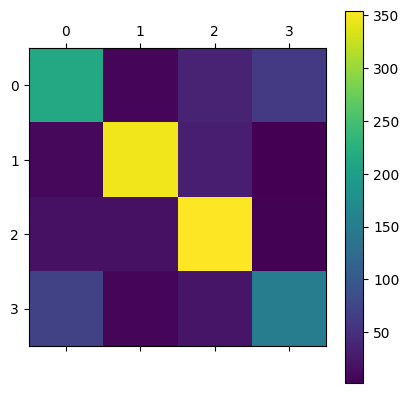

In [1]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')

# Loading 20 newsgroups dataset for categories
data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=remove)

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=remove)

target_names = data_train.target_names
y_train, y_test = data_train.target, data_test.target

# Extracting features from the data using a sparse vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')

X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)
print("Training samples: %d, training features: %d" % X_train.shape)
print("Testing samples: %d, Testing features: %d" % X_test.shape)

# Training and testing a Multinomial naive Bayes
clf = MultinomialNB(alpha=.01)

print("Training ...")
clf.fit(X_train, y_train)

print("Testing ...")
pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("Classification accuracy:   %0.3f" % score)

print("Classification report:")
print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))

# Show confusion matrix
print("Confusion matrix:")
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()

plt.show()

## Performance measures

Most common general measures for the classification methods in the machine learning are classification accuracy, precision, recall and F-score. 

Let's imagine we have a problem with two target classes. We would calculate performance of our classifier as follows:

| - |Correct  |Not Correct  |
|-------------|:-------:|:-----------:|
|Selected     |TP       | FP          |
|Not selected |FN       | TN          |

Classification accuracy:
$$
\textrm{CA} = \frac{\textrm{TP}+\textrm{TN}}{\textrm{TP}+\textrm{FP}+\textrm{FN}+\textrm{TN}}
$$

Precision or Positive predictive value: a proportion of selected items that are correct
$$
\textrm{P} = \frac{\textrm{TP}}{\textrm{TP}+\textrm{FP}}
$$

Recall or Sensitivity or True Positive Rate: a proportion of correct items that are selected (in medical terms probability of being test positive when disease present)
$$
\textrm{R} = \textrm{Sensitivity} = \textrm{True Positive Rate} = \frac{\textrm{TP}}{\textrm{TP}+\textrm{FN}}
$$

Specificity or True Negative Rate: a proportion of not correct items that are not selected (in medical terms probability of being test negative when disease absent)
$$
\textrm{Specificity} = \textrm{True Negative Rate} = \frac{\textrm{TN}}{\textrm{FP}+\textrm{TN}}
$$

F (i.e. $F_1$) measure: a harmonic mean (i.e., very conservative average) between precision and recall
$$
\textrm{F} = \frac{(\beta^2+1)\textrm{PR}}{\beta^2\textrm{P}+\textrm{R}}; \textrm{F}_1 = \frac{2\textrm{PR}}{\textrm{P}+\textrm{R}}
$$

If we have a multi-class problem, we need to take this into account also for the evaluation:
* Macro-averaging: compute performance for each class, then average
* Micro-averaging: collect decisions for all classes, compute contingency table, evaluate.

Micro- and macro-averages (for any metric) will compute slightly different things, and thus their interpretation differs:

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

An example:

| Class | TP | FP | FN | Precision | Recall | F-score |
|:-----:|:--:|:--:|:--:|:---------:|:------:|:------:|
| A     | 5  | 2  | 1  | 0.71      | 0.83   | 0.76 |
| B     | 10 | 90 | 7  | 0.1       | 0.58   | 0.17 |
| C     | 15 | 11 | 2  | 0.57      | 0.88   | 0.69 |

$$
\textrm{P}_{micro} = \frac{\textrm{TP}_A + \textrm{TP}_B + \textrm{TP}_C}{\textrm{TP}_A + \textrm{TP}_B + \textrm{TP}_C + \textrm{FP}_A + \textrm{FP}_B + \textrm{FP}_C} = 0.22
$$

$$
\textrm{P}_{macro} = \frac{\textrm{P}_A + \textrm{P}_B + \textrm{P}_C}{3} = 0.46
$$

$$
\textrm{R}_{micro} = \frac{\textrm{TP}_A + \textrm{TP}_B + \textrm{TP}_C}{\textrm{TP}_A + \textrm{TP}_B + \textrm{TP}_C + \textrm{FN}_A + \textrm{FN}_B + \textrm{FN}_C} = 0.75
$$

$$
\textrm{R}_{macro} = \frac{\textrm{R}_A + \textrm{R}_B + \textrm{R}_C}{3} = 0.76
$$

$$
\textrm{F}_{micro} = accuracy = \frac{TP}{TP + \frac{1}{2}*(FP+FN)} = 0.35
$$

$$
\textrm{F}_{macro} = \frac{\textrm{F}_A + \textrm{F}_B + \textrm{F}_C}{3} = 0.54
$$

$$
\textrm{F}_{weighted} = \frac{6*\textrm{F}_A + 17*\textrm{F}_B + 17*\textrm{F}_C}{6+17+17} = 0.48
$$

F micro-averaging essentially computes the **proportion of correctly classified observations** out of all observations. If we think about this, this definition is in fact what we use to calculate overall **accuracy**.


In general, if you are working with an imbalanced dataset where all classes are equally important, using the **macro average** would be a good choice as it treats all classes equally.

If you have an imbalanced dataset but want to assign greater contribution to classes with more examples in the dataset, then the **weighted average** is preferred.

Suppose you have a balanced dataset and want an easily understandable metric for overall performance regardless of the class. In that case, you can go with accuracy, which is essentially our **micro F1 score**.

In [2]:
# TODO: Calculate the scores for the example above

def f1_micro():
    pass

def f1_macro():
    pass

def f1_weighted():
    pass

In [3]:
# TODO: Instead of TF-IDF features for the example above, do feature 
# engineering by yourself (e.g., based on pseudocode) and 
# compare results.



## Exercises

* Experiment with *20 newsgroups* dataset on your own (manually download and import, remove headers, adjust parameters, train and test on the same data :), ...).
* Experiment with other classifiers: Logistic regression, Random forest, SVM, ...
* Implement your own features.
* Try to play with some other dataset or create your own. For example, use [Reuters-21578](http://www.daviddlewis.com/resources/testcollections/reuters21578/) - example [here](http://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-text-classification-1.html).